Basic model to correlate an outfielder's average starting position to their probability to catch a given ball given its exit velocity, launch angle, and spray angle. 

In [1]:
import pandas as pd
import pybaseball
import math

In [2]:
data = {
    'Player': [
        'Call, Alex', 'Matos, Luis', 'Tauchman, Mike', 'Duvall, Adam', 'Moniak, Mickey', 'Duran, Jarren',
        'Rojas, Johan', 'Trout, Mike', 'Taylor, Michael A.', 'Bader, Harrison', 'Wiemer, Joey', 'Taveras, Leody',
        'Kiermaier, Kevin', 'Bellinger, Cody', 'Nimmo, Brandon', 'Ruiz, Esteury', 'Marsh, Brandon', 'Isbel, Kyle',
        'Mullins, Cedric', 'Doyle, Brenton', 'Greene, Riley', 'Suwinski, Jack', 'Chisholm Jr., Jazz', 'Rodríguez, Julio',
        'Grisham, Trent', 'Harris II, Michael', 'Friedl, TJ', 'Robert Jr., Luis', 'Meyers, Jake', 'Siri, Jose',
        'McCormick, Chas', 'Outman, James', 'Straw, Myles', 'Varsho, Daulton', 'Nootbaar, Lars', 'Thomas, Alek'
    ],
    'Depth': [
        332, 330, 329, 328, 328, 327, 327, 326, 326, 326,
        325, 325, 325, 324, 324, 324, 324, 323, 323, 323,
        323, 323, 322, 322, 321, 321, 321, 321, 321, 320,
        319, 319, 318, 317, 316, 313
    ],
    'Angle': [
        0, 2, 2, 1, 1, 0, 3, 2, 1, -1,
        1, 0, 3, 2, 1, 2, 2, 3, 3, 2,
        2, 2, 1, 2, 3, 3, 4, 2, 2, 1,
        2, 2, 2, 3, 2, 1
    ]
}

cf_r = pd.DataFrame(data)

In [3]:
data = {
    'Player': [
        'Call, Alex', 'Tauchman, Mike', 'Robles, Victor', 'Bellinger, Cody', 'Trout, Mike', 'Wiemer, Joey',
        'Rojas, Johan', 'Kiermaier, Kevin', 'Bader, Harrison', 'Taylor, Michael A.', 'Nimmo, Brandon', 'Marsh, Brandon',
        'Isbel, Kyle', 'Harris II, Michael', 'Ruiz, Esteury', 'Rodríguez, Julio', 'Mullins, Cedric', 'Doyle, Brenton',
        'Grisham, Trent', 'Suwinski, Jack', 'Friedl, TJ', 'Chisholm Jr., Jazz', 'Siri, Jose', 'Robert Jr., Luis',
        'Meyers, Jake', 'Outman, James', 'Straw, Myles', 'Varsho, Daulton', 'Thomas, Alek'
    ],
    'Depth': [
        333, 327, 327, 325, 325, 325, 325, 325, 324, 323,
        323, 323, 322, 322, 322, 322, 321, 321, 320, 320,
        319, 319, 318, 318, 318, 318, 317, 317, 312
    ],
    'Angle': [
        -1, -2, -1, -2, -3, 0, -3, -3, -2, -1,
        -1, -2, -3, -2, -3, -3, -3, -2, -3, -3,
        -4, -2, -1, -2, -2, -3, 0, -2, -2
    ]
}

# Creating the DataFrame
cf_l = pd.DataFrame(data)

In [4]:
data = {
    'Player': [
        'Rosario, Eddie', 'Happ, Ian', 'Garrett, Stone', 'Gurriel Jr., Lourdes', 'Baddoo, Akil', 'Peralta, David',
        'Soto, Juan', 'Kwan, Steven', 'De La Cruz, Bryan', 'Schwarber, Kyle', 'Hays, Austin', 'Merrifield, Whit',
        'Arozarena, Randy', 'Kemp, Tony', 'Reynolds, Bryan', 'Kelenic, Jarred', 'Profar, Jurickson', 'Benintendi, Andrew',
        'Julks, Corey', 'Grichuk, Randal', 'Ward, Taylor', 'Yoshida, Masataka', 'Yelich, Christian', 'Jankowski, Travis',
        'Varsho, Daulton', 'Pham, Tommy', 'Canha, Mark', 'Carroll, Corbin', 'Melendez, MJ', 'Jones, Nolan'
    ],
    'Depth': [
        310, 309, 309, 306, 306, 305, 304, 304, 304, 304,
        302, 302, 301, 301, 301, 301, 300, 300, 300, 300,
        300, 299, 299, 299, 299, 298, 298, 297, 297, 296
    ],
    'Angle': [
        -25, -27, -26, -27, -25, -26, -25, -25, -26, -26,
        -25, -25, -26, -25, -25, -26, -25, -27, -26, -25,
        -25, -28, -27, -28, -25, -28, -26, -26, -27, -27
    ]
}

# Creating the DataFrame
lf_r = pd.DataFrame(data)

In [5]:

data = {
    'Player': [
        'Garrett, Stone', 'Dickerson, Corey', 'Happ, Ian', 'Kwan, Steven', 'Benintendi, Andrew', 'Gurriel Jr., Lourdes',
        'De La Cruz, Bryan', 'Yelich, Christian', 'Olivares, Edward', 'Rosario, Eddie', 'Arozarena, Randy', 'Profar, Jurickson',
        'Ward, Taylor', 'Schwarber, Kyle', 'Reynolds, Bryan', 'Hays, Austin', 'Peralta, David', 'Kelenic, Jarred', 'Varsho, Daulton',
        'Soto, Juan', 'Merrifield, Whit'
    ],
    'Depth': [
        300, 299, 295, 294, 293, 292, 292, 292, 290, 289,
        288, 288, 286, 286, 286, 285, 284, 283, 283, 282,
        278
    ],
    'Angle': [
        -29, -29, -29, -27, -28, -28, -29, -29, -28, -29,
        -28, -30, -28, -29, -28, -29, -29, -31, -30, -29,
        -30
    ]
}

# Creating the DataFrame
lf_l = pd.DataFrame(data)

In [6]:
data = {
    'Player': [
        'Thomas, Lane', 'Colás, Oscar', 'García, Adolis', 'Taylor, Tyrone', 'Laureano, Ramón', 'Conforto, Michael',
        'Lowe, Josh', 'Brennan, Will', 'Renfroe, Hunter', 'Stewart, DJ', 'Marte, Starling', 'Hernández, Teoscar',
        'Acuña Jr., Ronald', 'Santander, Anthony', 'Benson, Will', 'Brown, Seth', 'Carroll, Corbin', 'Bryant, Kris',
        'Sheets, Gavin', 'Tucker, Kyle', 'Kepler, Max', 'Castellanos, Nick', 'Walker, Jordan', 'Suzuki, Seiya',
        'Heyward, Jason', 'Sánchez, Jesús', 'Judge, Aaron', 'McCarthy, Jake', 'Tatis Jr., Fernando', 'Vierling, Matt',
        'Carpenter, Kerry', 'Verdugo, Alex', 'Betts, Mookie', 'Melendez, MJ', 'Springer, George'
    ],
    'Depth': [
        304, 300, 297, 294, 294, 293, 293, 293, 293, 293,
        292, 292, 291, 291, 291, 291, 290, 290, 290, 290,
        290, 290, 290, 289, 289, 288, 288, 287, 287, 287,
        286, 284, 284, 283, 282
    ],
    'Angle': [
        29, 29, 28, 27, 30, 29, 27, 28, 28, 28,
        28, 28, 30, 29, 30, 29, 27, 27, 29, 28,
        30, 28, 29, 29, 28, 27, 27, 29, 30, 28,
        27, 28, 27, 27, 29
    ]
}

# Creating the DataFrame
rf_r = pd.DataFrame(data)

In [7]:
data = {
    'Player': [
        'Hernández, Teoscar', 'Thomas, Lane', 'Acuña Jr., Ronald', 'Laureano, Ramón', 'Colás, Oscar', 'Sánchez, Jesús',
        'Renfroe, Hunter', 'Lowe, Josh', 'Santander, Anthony', 'Castellanos, Nick', 'Walker, Jordan', 'Heyward, Jason',
        'Conforto, Michael', 'Betts, Mookie', 'Springer, George', 'Suzuki, Seiya', 'Brennan, Will', 'Kepler, Max', 'Tatis Jr., Fernando',
        'Taylor, Tyrone', 'Marte, Starling', 'Sheets, Gavin', 'Anderson, Brian', 'Tucker, Kyle', 'McCarthy, Jake', 'Bryant, Kris',
        'Melendez, MJ', 'Verdugo, Alex'
    ],
    'Depth': [
        310, 310, 306, 306, 305, 304, 303, 302, 302, 302,
        302, 301, 300, 300, 299, 297, 297, 297, 296, 296,
        296, 295, 295, 294, 293, 292, 288, 287
    ],
    'Angle': [
        23, 27, 26, 26, 27, 25, 25, 27, 25, 25,
        27, 25, 26, 26, 26, 28, 26, 28, 26, 27,
        27, 27, 27, 26, 26, 25, 27, 29
    ]
}

# Creating the DataFrame
rf_l = pd.DataFrame(data)

In [8]:
pos_r = pd.concat([cf_r, lf_r, rf_r], axis=0)
pos_r.reset_index(drop=True, inplace=True)

pos_l = pd.concat([cf_l, lf_l, rf_l], axis=0)
pos_l.reset_index(drop=True, inplace=True)

pos_r['batter'] = 'r'
pos_l['batter'] = 'l'

pos = pd.concat([pos_r, pos_l], axis=0)
pos['last'] = pos['Player'].str.split(',').str[0].str.lower().str.strip()
pos['first'] = pos['Player'].str.split(',').str[1].str.lower().str.strip()
pos = pos.drop(['Player'], axis=1)
keys = pos.apply(lambda x: pybaseball.playerid_lookup(x['last'], x['first'])['key_mlbam'], axis=1)
keys = keys.drop([1, 2], axis=1)
pos['player_id'] = keys

In [9]:
df = pd.read_csv('2023_mlb_statcast.csv')
speed = pd.read_csv('sprint_speed.csv')

In [10]:
def get_fielder(x):
    if x.loc['hit_location'] == 7:
        return x.loc['fielder_7']
    if x.loc['hit_location'] == 8:
        return x.loc['fielder_8']
    if x.loc['hit_location'] == 9:
        return x.loc['fielder_9']

In [11]:
def get_speed(x):
    speed = pd.read_csv('sprint_speed.csv')
    if x.loc['fielder'] in speed['player_id'].unique():
        sp = speed.loc[speed['player_id'] == x.loc['fielder']]
    return sp.iloc[0].at['sprint_speed']

In [12]:
df = df.fillna(0)
df = df.loc[(df['hc_x'] != 0) | (df['hc_y'] != 0)]
df = df.loc[(df['bb_type'] != 'ground_ball')]
df = df.loc[(df['bb_type'] != 0)]
df = df.loc[df['hit_location'].isin([7,8,9])]
df['fielder'] = df.apply(get_fielder, axis=1)
df = df.loc[df['fielder'].isin(pos['player_id'])]
df['speed'] = df.apply(get_speed, axis=1)

In [13]:
def fielder_x(x):
    angle = math.radians(x.loc['Angle'])
    coor_x = x.loc['Depth'] * math.sin(angle)
    return coor_x

In [14]:
def fielder_y(x):
    angle = math.radians(x.loc['Angle'])
    coor_y = x.loc['Depth'] * math.cos(angle)
    return coor_y - 60.5

In [15]:
pos['pos_x'] = pos.apply(fielder_x, axis=1)
pos['pos_y'] = pos.apply(fielder_y, axis=1)
pos.to_csv('avg_player_pos.csv')

In [16]:
def get_fielder_x(x):
    pos = pd.read_csv('avg_player_pos.csv')
    if x.loc['fielder'] in pos['player_id'].unique():
        x_loc = pos.loc[pos['player_id'] == x.loc['fielder']]
        x_loc = x_loc.loc[x_loc['batter'] == x.loc['stand'].lower()]
    if x_loc.empty:
        return math.nan
    else:
        return x_loc.iloc[0].at['pos_x']

In [17]:
def get_fielder_y(x):
    pos = pd.read_csv('avg_player_pos.csv')
    if x.loc['fielder'] in pos['player_id'].unique():
        y_loc = pos.loc[pos['player_id'] == x.loc['fielder']]
        y_loc = y_loc.loc[y_loc['batter'] == x.loc['stand'].lower()]
    if y_loc.empty:
        return math.nan
    else:
        return y_loc.iloc[0].at['pos_y']

In [18]:
df = df.loc[df['fielder'].isin(pos['player_id'].unique())]
df['fielder_x'] = df.apply(get_fielder_x, axis=1)
df['fielder_y'] = df.apply(get_fielder_y, axis=1)
df = df.loc[df['fielder_x'] != math.nan]
df = df.loc[df['fielder_y'] != math.nan]

In [19]:
def cart_dist(x):
    dist = math.sqrt(pow(x.loc['hc_x'] - x.loc['fielder_x'], 2) + 
                     pow(x.loc['hc_y'] - x.loc['fielder_y'], 2))
    return dist

In [20]:
df['dist_to_ball'] = df.apply(cart_dist, axis=1)

In [21]:
def spray_angle(x):
    spray = math.atan((x.loc['hc_x'] - 125.42) / (198.27 - x.loc['hc_y']))
    spray = math.degrees(spray) * .75
    return spray

In [22]:
def bat_x(x):
    angle = math.radians(x.loc['spray_angle'])
    coor_x = x.loc['hit_distance_sc'] * math.sin(angle)
    return coor_x

In [23]:
def bat_y(x):
    angle = math.radians(x.loc['spray_angle'])
    coor_y = x.loc['hit_distance_sc'] * math.cos(angle)
    return coor_y

In [24]:
df['spray_angle'] = df.apply(spray_angle, axis=1)
df['new_hc_x'] = df.apply(bat_x, axis=1)
df['new_hc_y'] = df.apply(bat_y, axis=1)

In [31]:
df_outs = df.loc[df['events'] == 'field_out']

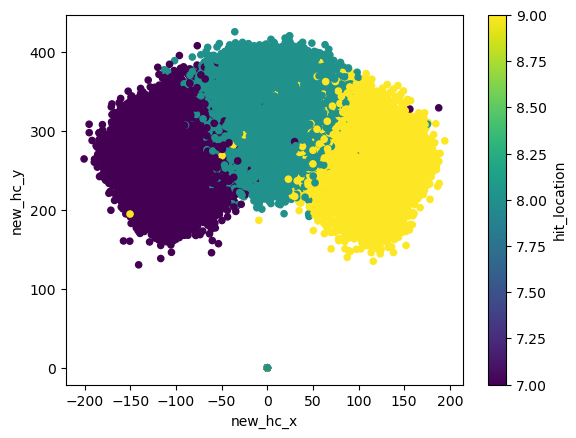

In [32]:
plot1 = df_outs.plot.scatter(x='new_hc_x', y='new_hc_y', c='hit_location')

In [33]:
df_hits = df.loc[df['events'] != 'field_out']

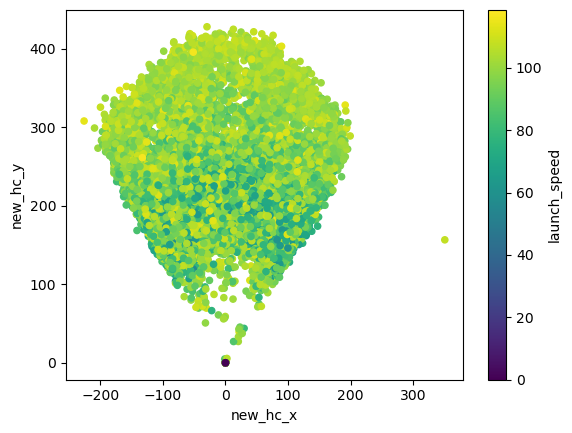

In [37]:
plot2 = df_hits.plot.scatter(x='new_hc_x', y='new_hc_y', c='launch_speed')